<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ANOVA-as-Hierachial-model" data-toc-modified-id="ANOVA-as-Hierachial-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ANOVA as Hierachial model</a></span></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-the-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-the-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for the question under investigation</a></span><ul class="toc-item"><li><span><a href="#Study/data-description" data-toc-modified-id="Study/data-description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Study/data description</a></span></li></ul></li><li><span><a href="#Data-cleaning-and-Exploratory-data-analysis" data-toc-modified-id="Data-cleaning-and-Exploratory-data-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data cleaning and Exploratory data analysis</a></span></li><li><span><a href="#Define-the-descriptive-model" data-toc-modified-id="Define-the-descriptive-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Define the descriptive model</a></span></li><li><span><a href="#Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{ij}-\sim-normal(\mu_j,-\sigma)
\\-\mu_j-\sim-normal(\mu,-\tau)
\\-\eta_j-\sim-normal(\mu,-\tau)
\end{align*}" data-toc-modified-id="Step-2---Define-the-descriptive-statistical-model-\begin{align*}
y_{ij}-\sim-normal(\mu_j,-\sigma)
\\-\mu_j-\sim-normal(\mu,-\tau)
\\-\eta_j-\sim-normal(\mu,-\tau)
\end{align*}-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 2 - Define the descriptive statistical model <div class="MathJax_Display" style="text-align: center;"></div><script type="math/tex; mode=display" id="MathJax-Element-2">\begin{align*}
y_{ij} \sim normal(\mu_j, \sigma)
\\ \mu_j \sim normal(\mu, \tau)
\\ \eta_j \sim normal(\mu, \tau)
\end{align*}</script></a></span></li><li><span><a href="#Stan-model" data-toc-modified-id="Stan-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Stan model</a></span></li><li><span><a href="#Posterior-predictive-checks" data-toc-modified-id="Posterior-predictive-checks-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Posterior predictive checks</a></span></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-one-sample-t-test-equivalent" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-one-sample-t-test-equivalent-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Reporting the results of the Bayesian one sample t-test equivalent</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
import stan as ps
import numpy as np 
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing nest_asyncio is only necessary to run pystan in Jupyter Notebooks.
import nest_asyncio
nest_asyncio.apply();

In [1]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [6]:
dir = r"C:\Users\harri\Downloads"
os.chdir(dir)

# ANOVA as Hierachial model

As discussed in the the Bayesian estimztion of classical ANOVA notebook, ANOVA is regularly applied as an omnibus test, with pairwise comparisons applied after establishing if there is a signficant F-test result is found between the analysed groups data. In this notebook a model is demonstrated to show how an ANOVA style model can be created using a hierachial model (random intercept model).

# Bayesian inference
<font size = "3"> Following on from that quick description of the classic one sample t-test above its important to keep in mind that Bayesian inference is all derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to the One-way ANOVA, framed as hierachial model, it is fundamentally different, because it uses fully probabilistic modelling and the infernce is not based on sampling distributions.</font>
    
<font size = "1"> For a fuller description see the Practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for the question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. If scientific research publication is the goal the priors will need to be accepted by a skeptical audience. This should be achievable using prior predictive checks to ascertain if the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then use the posterior for conducting your inferences.

5. Conduct model checks. i.e. Posterior predictive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for the question under investigation

## Study/data description

The follwing analysis has been conducted on data orignally analysed by Grossman and Kross (2014) second of three studies. With the data being dowloaded from https://drive.google.com/file/d/0Bz-rhZ21ShvOc1lPU2lWcVcxZEk/view?resourcekey=0--I7fSN9bKepssssFAW_51A and stored on the github repository.

The purpose of Grossman and Kross (2014) study was to investigate Solomons Paradox. This paradox is displayed in the tendency of people to reason better about other people problems compared to their own. A potential explanation of Simposn paradox is hypotheisised to be a result of psychological distance from others problems comapred to ones own problems. Grossman and Kross (2014) investigated this potential explanation of the Solomons paradox through the guise of romantic relationships. They achieved this through the recruitment of 120 univesity students who were engaged in monogamous heterosexual relationships. 

The 120 students were randomly assigned to one of four conditions. These four conditions were split into two targets (self vs other) and 2 perspectives (immersed and distanced).

Upon completion of the contemplation task participants gave responses to a set of questions devised to provide a wise reasoning score to be analysed.

# Data cleaning and Exploratory data analysis

In [7]:
# Import data file .csv
df = pd.read_csv("Grossman and Kross 2014 Study 2.csv")
df['WISDOM'] = pd.to_numeric(df['WISDOM'], errors='coerce')
# Convert NAN
df['WISDOM'] = df['WISDOM'].replace(np.nan, 0, regex=True)

# add new conditon column

In [ ]:
# Plot boxplot 
sns.boxplot(x = 'CONDITION', y = 'WISDOM', data = df);

In [ ]:
# Plot all four groups data
sns.distplot(df['WISDOM']);

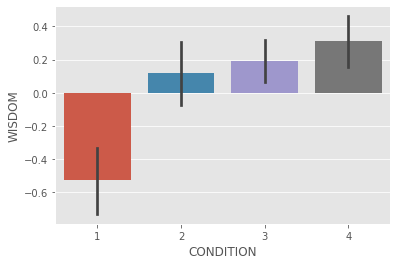

In [20]:
#Plot barplot
sns.barplot(x = 'CONDITION', y = 'WISDOM', data = df, ci=68);

# Define the descriptive model

# Step 2 - Define the descriptive statistical model \begin{align*}
y_{ij} \sim normal(\mu_j, \sigma)
\\ \mu_j \sim normal(\mu, \tau)
\\ \eta_j \sim normal(\mu, \tau)
\end{align*} 

# Stan model

In [168]:
HierachialANOVA = """

data{

int<lower = 0> n; // Total number of data points
vector[n] y; // Dependent variable
int<lower = 0> j; //number of groups
int<lower=1, upper = j> group_id[n]; // group id's;

// Prior values to be defined on input to generalise code
int mu_m; int mu_sd;
int tau_m; int tau_sd;
int sigma_m; int sigma_sd;

// Logically evaluates below to determine if it running prior predictive checks,
// or fitting the model.
int<lower= 0, upper = 1> onlyprior;

}

parameters{
real mu; // Population mean
real<lower = 0> tau; // Population standard deviation
vector[j] eta; // Non centered parameterisation container
real<lower = 0> sigma; // Standard deviation 
}

transformed parameters{
// non-centred parameterisation
vector[j] theta = mu + eta * tau;
}

model{

// Priors
mu ~ normal(mu_m, mu_sd);  // Prior model
tau ~ normal(tau_m, tau_sd); // Prior model
eta ~ std_normal(); // Non-centered hierarchical model
sigma ~ normal(sigma_m, sigma_sd);

// likelihood
if(!onlyprior){
y ~ normal(theta[group_id], sigma);
    }
}

generated quantities{
  real y_rep[n] = normal_rng(theta[group_id], sigma);
  
  // Experimental Contrasts
  // contrast Self-Immersed and comined average of the
  // Other perspective conditions
  real c1 = theta[1] - ((theta[3] + theta[4])/2);
  // Contrast between Self-Immersed and Self-Distanced
  real c2 = theta[1] - theta[2];
  // Contrast between Other-Immersed and Other-Distanced
  real c3 = theta[3] - theta[4];
  // Contrast between Self-Distance and combined average
  // of the other perspective conditions
  real c4 = theta[2] - ((theta[3] + theta[4])/2);
  
  // Standardised effects (cohens-d)
  real c1s = c1/sigma;
  real c2s = c2/sigma;
  real c3s = c3/sigma;
  real c4s = c4/sigma;
}
"""

In [169]:
sm = ps.StanModel(model_code = HierachialANOVA)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_073871ab68a4728969665b8a0ec778e6 NOW.


In [180]:
data = {'n': len(df),
        'y': df['WISDOM'].values,
        'j': max(df['CONDITION']),
        'group_id': df['CONDITION'],
        'onlyprior': 0,
        'mu_m': 0,
        'mu_sd': 1,
        'tau_m': 0,
        'tau_sd': 1,
        'sigma_m': 0,
        'sigma_sd': 1}

In [181]:
fit = sm.sampling(data = data, iter = 2000, control = dict(adapt_delta = .9), seed= 10)

In [187]:
#print(fit)

In [183]:
x = fit['y_rep'].T

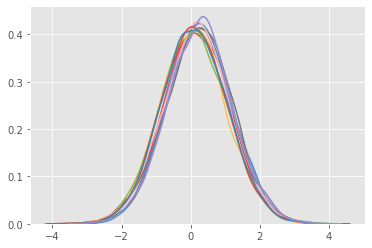

In [184]:
for i in range(10):
    sns.kdeplot(x[i]);

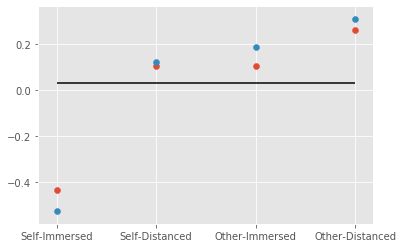

In [185]:
# Demonstrate shrinkage due to pooling in hierachial (varying intercept) model
mean_c1 = df.loc[df['CONDITION'] == 1]['WISDOM']
mean_c1 = np.mean(mean_c1)

mean_c2 = df.loc[df['CONDITION'] == 2]['WISDOM']
mean_c2 = np.mean(mean_c2)

mean_c3 = df.loc[df['CONDITION'] == 3]['WISDOM']
mean_c3 = np.mean(mean_c3)

mean_c4 = df.loc[df['CONDITION'] == 4]['WISDOM']
mean_c4 = np.mean(mean_c4)

x_coordinates = [1, 2, 3, 4]
y_coordinates = [np.mean(fit['theta[1]']), np.mean(fit['theta[2]']),
                 np.mean(fit['theta[2]']), np.mean(fit['theta[4]'])]
y_coordinatesm = [mean_c1, mean_c2, mean_c3, mean_c4]

plt.scatter(x_coordinates, y_coordinates);
plt.scatter(x_coordinates, y_coordinatesm);
plt.xticks([1, 2, 3, 4],['Self-Immersed', 'Self-Distanced', 'Other-Immersed', 'Other-Distanced'])
plt.hlines(np.mean(fit['mu']), xmin=1, xmax=4);

The point plot above shows the effect of shrinkage in hierachial models, with all the parameter estimates (red) for each group being shrunk towards the global mean compared to their sample means in blue

# Posterior predictive checks

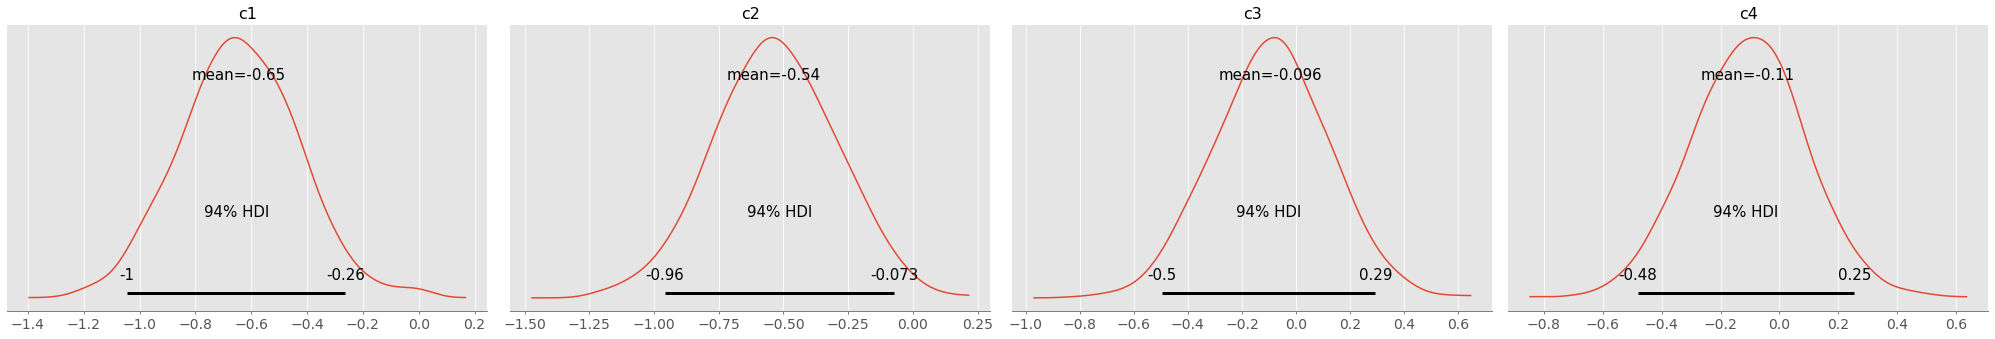

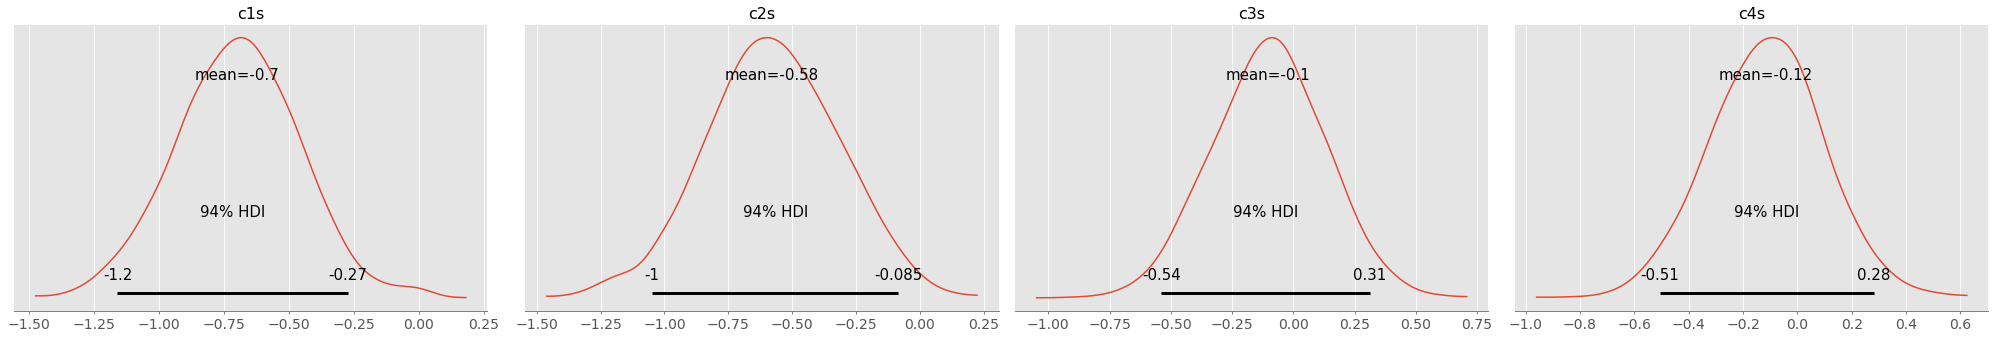

In [186]:
az.plot_posterior(fit, var_names=['c1', 'c2', 'c3','c4']);
az.plot_posterior(fit, var_names=['c1s', 'c2s', 'c3s','c4s']);

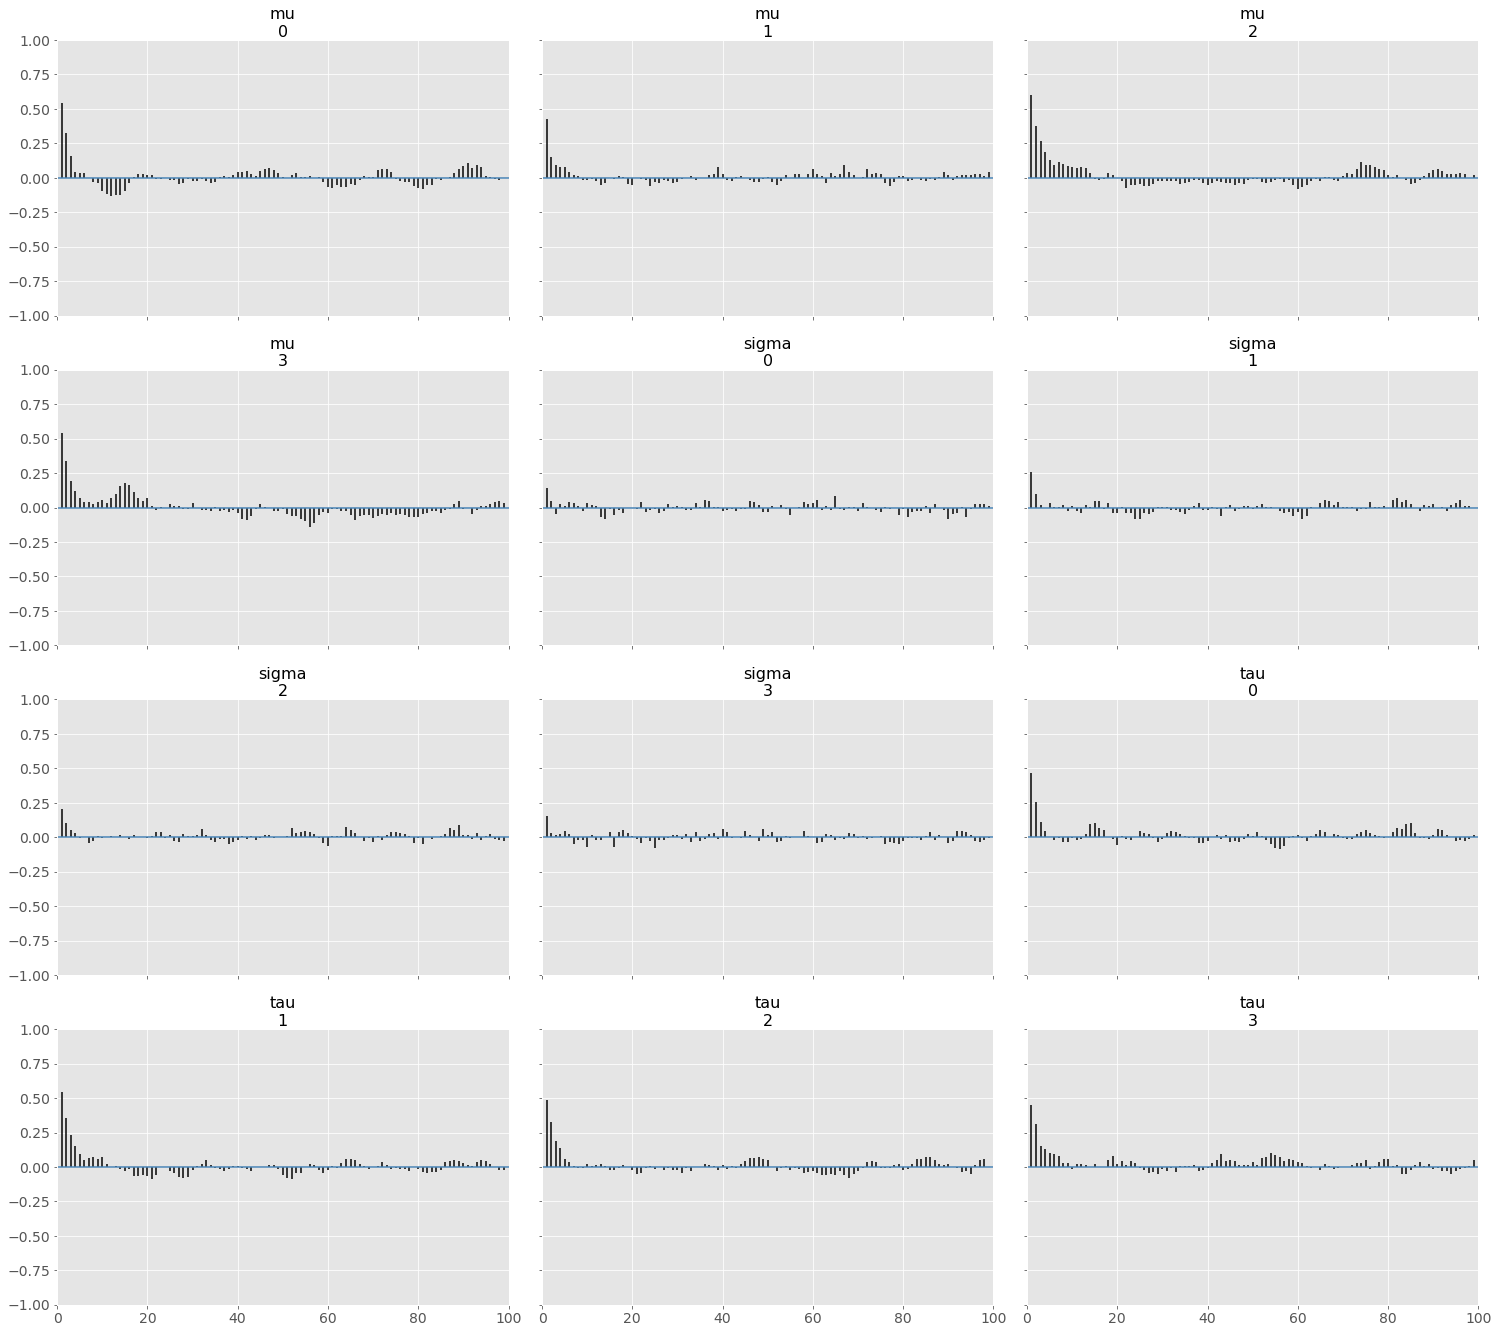

In [188]:
az.plot_autocorr(fit, var_names=['mu', 'sigma', 'tau']);

Autocorrelation plots show no pathologies all quickly returning to 0

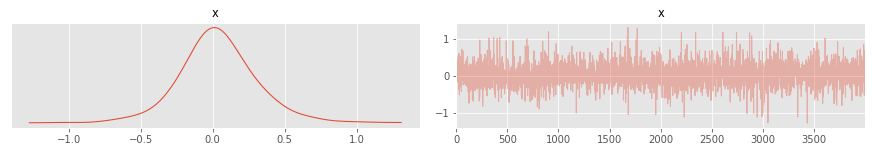

In [189]:
az.plot_trace(fit['mu']);

Traceplots show Fuzzy caterpillar and no serious pathologies for sampling

In [223]:
#Convert pystan fit object to IO for Arviz functions.
PPC_data = az.from_pystan(
                posterior=fit,
                posterior_predictive='y_rep',
                observed_data=["y"])

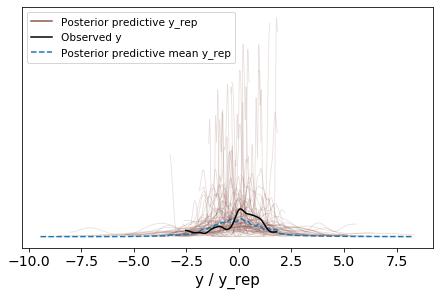

In [224]:
az.plot_ppc(PPC_data, data_pairs={"y":"y_rep"}, num_pp_samples=100);

# Reporting the results of the Bayesian one sample t-test equivalent

<font size = "3">As Kruscke correctly points out there is not standard formula or presentation method for results like the APA guide for reporting frequentist analyses using the Bayesian framework. It is likely there never will be, because as McElreath (2020) explains, Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2019) have argued visualisations maybe even more key, so all the visualtions above would have to be included with any write up. Anyway, the write up below generally follows the advice of Kruscke (2015) chapter 25. In any application though it comes down to the problem to be described and the audience that needs to be convinced. </p><br/>

<h2>Write up</h2><br/>

# References

Gelman, A., Hill, J., & Yajima, M. (2012). Why we (usually) don't have to worry about multiple comparisons. Journal of research on educational effectiveness, 5(2), 189-211.

Grossmann, I., & Kross, E. (2014). Exploring Solomon’s paradox: Self-distancing eliminates self-other
asymmetry in wise reasoning about close relationships in younger and older adults.
Psychological Science, 25, 1571-1580.